# Relationship between a Country's Population and Projected GDP Growth 2023

Economists calculates their GDP forecasts based on many factors. Commiting a deep study of those factors, it could be observed that they have strong relationship to the demographics of the country or region. This project aims to understand the correlation between population and GDP forecasts through observation and analysis.

This project is a requirement for the course [**Data Analysis with python: From Zero to Pandas**](/https://jovian.com/learn/data-analysis-with-python-zero-to-pandas).

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/orensa/2023-population-per-country-and-their-gdp-forecast' 

In [3]:
!pip install opendatasets
import opendatasets as od
od.download(dataset_url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: orensa
Your Kaggle Key: ··········


100%|██████████| 185k/185k [00:00<00:00, 72.6MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = '/content/2023-population-per-country-and-their-gdp-forecast'

In [5]:
import os
os.listdir(data_dir)

['2023Population.csv', 'GDPForecast.csv']

## Data Preparation and Cleaning




The data provided is not perfect and some of the values on country columns between the two datasets do not match. The projected GDP is not updated to the latest GDP pojections given by International Monetary Fund(IMF).


For these reason, this project is limited to the values between the two tables that match and to the dataset available.

Import package

In [6]:
import pandas as pd

Import dataframe

In [7]:
df = pd.read_csv('/content/2023-population-per-country-and-their-gdp-forecast/2023Population.csv', encoding = 'unicode_escape', engine ='python')

Removing rows

In [8]:
df = df.query('GROUP != "TOTAL"')

Subsetting Columns

In [9]:
df = df[[#'FIPS', 'GENC', 
         'Country/Area Name', 
         #'Year', 
         'GROUP', 
         #'Population',
         '% of Population', 
         #'Male Population', '% of Males', 'Female Population', '% of Females', 'Sex Ratio'
         ]]

Renaming Columns

In [10]:
df = df.rename(columns={'Country/Area Name': 'Country', '% of Population': 'Population_Percentage' })

Importing GDP forecast

In [11]:
right_data = pd.read_csv('/content/2023-population-per-country-and-their-gdp-forecast/GDPForecast.csv')

Merging datasets

In [12]:
df = pd.merge(df, right_data, how='left', left_on='Country', right_on='Country')

Removing not needed columns

In [13]:
df = df[['Country', 'GROUP', 'Population_Percentage', '2023', 
         #'2024', '2025','Unnamed: 4'
         ]]

Removing null

In [14]:
df = df.loc[~df['2023'].isna()]


Pivot columns

In [15]:
df = df.pivot(index = ['Country','2023'], columns='GROUP', values='Population_Percentage').reset_index()

Creating needed Columns

In [16]:
df['Dependent_Young'] = sum([df['0 - 4'],df['5 - 9'],df['10 - 14'],df['15 - 19']])
df['Working_Population'] = sum([df['20 - 24'],df['25 - 29'],df['30 - 34'],df['35 - 39'],df['40 - 44'],df['45 - 49'],df['50 - 54'],df['55 - 59'],df['60 - 64' ]])
df['Dependent_Old'] = sum([df['65 - 69'],df['70 - 74'],df['75 - 79'],df['80 - 84'],df['85 - 89'],df['90 - 94'],df['95 - 99'],df['100+']])

Removing Columns

In [17]:
df = df[['Country','2023','Dependent_Young', 'Working_Population','Dependent_Old']]

Adding ratio between working population and dependent population

In [18]:
df['Working_to_Dependent_ratio'] = df['Working_Population'] / sum([df['Dependent_Old'], df['Dependent_Young']])

Renaming columns

In [19]:
df = df.rename(columns={'2023':'2023_GDP_Forecast'})

## Exploratory Analysis and Visualization




In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### 2023 GDP Forecast Distribution

The following visualizations aims to figure out the frequency of the forecasted GDP Growth.

The frequency is plotted on a statistical graphs in particular **normal distribution** and **box plot** in order to figure out the average Forecasted GDP Growth. The graphs also gives us additional data that might be useful such as **standard deviation** and **outliers**.

A pie chart would also be utilized in order to visualized which countries belong to certain categories in regard to their 2023 GDP Forecast.

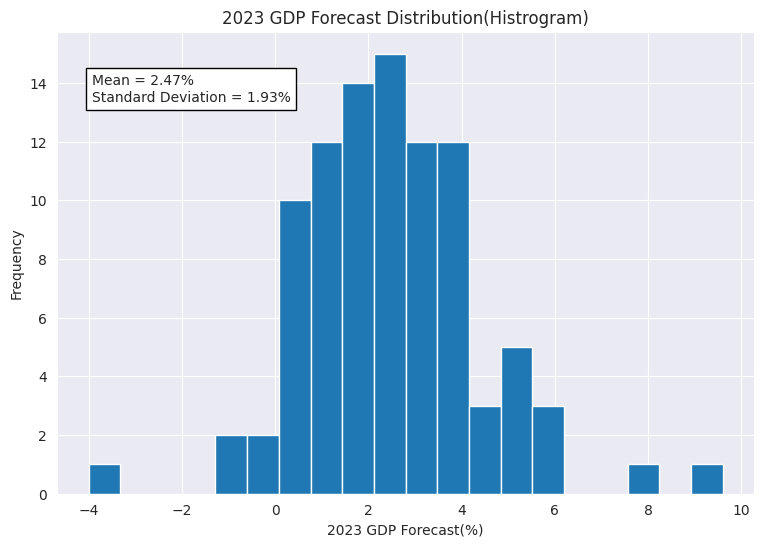

In [21]:
forecast_mean = df['2023_GDP_Forecast'].mean()
forecast_std = df['2023_GDP_Forecast'].std()
fig, axes = plt.subplots(1, 1, figsize=(9,6))
ax = axes
ax.set_title('2023 GDP Forecast Distribution(Histrogram)')
ax.hist(df['2023_GDP_Forecast'], bins=20)
ax.set_ylabel('Frequency')
ax.set_xlabel('2023 GDP Forecast(%)')
ax.text(transform=ax.transAxes, x = 0.05, y = 0.85,
        bbox=dict(facecolor='white', edgecolor='black'),
        s=f'Mean = {forecast_mean:.2f}%\nStandard Deviation = {forecast_std:.2f}%')

plt.show()

*Personal Bias:*

2023 began rough to the Global Economy. It began by receiving the problems left by 2022 such as the war in Eastern Europe, high inflation, and rising central bank interest rates. Because of these I was expecting a negative average 2023 GDP Growth Forecast.

*What the data shows:*

According to the available data, the average(mean) 2023 GDP Growth Forecast is 2.47% with a standard deviation of 1.93%. This is opposite of my personal bias.

---

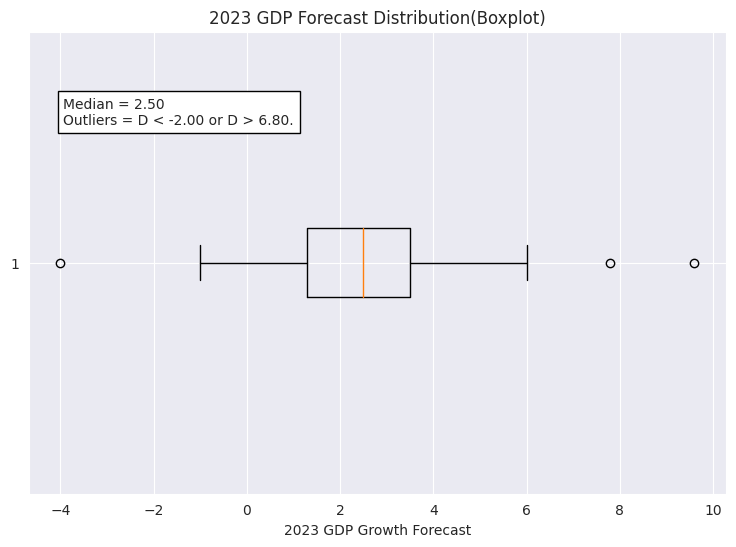

In [22]:
forecast_Q1 = df['2023_GDP_Forecast'].quantile(0.25)
forecast_Q2 = df['2023_GDP_Forecast'].quantile(0.5)
forecast_Q3 = df['2023_GDP_Forecast'].quantile(0.75)
forecast_IQR = forecast_Q3 - forecast_Q1
forecast_leftD = forecast_Q1 - (1.5*forecast_IQR)
forecast_rightD = forecast_Q3 + (1.5*forecast_IQR)
fig, axes = plt.subplots(1, 1, figsize=(9,6))
ax = axes
ax.set_title('2023 GDP Forecast Distribution(Boxplot)')
ax.set_xlabel('2023 GDP Growth Forecast')
ax.boxplot(df['2023_GDP_Forecast'], vert= False)
ax.text(transform=ax.transAxes, x = 0.05, y = 0.8,
        bbox=dict(facecolor='white', edgecolor='black'),
        s=f'Median = {forecast_Q2:.2f}\nOutliers = D < {forecast_leftD:.2f} or D > {forecast_rightD:.2f}.')
plt.show()

*Personal Bias:*

The collapse of the Economy of Sri Lanka made me assume that there would be a spread of fear on the global economy which could instigate an alarming number of countries having a lower that normal GDP growth. The harsh global economic environment also made me assume that there would be no higher than normal GDP growth. In statistics, these anomalies are referred to as outliers. 

*What the data shows:*

The box plot above suggests that there are more outliers on the positive side than outliers on the negative side. This is contradictory to my personal bias.

---

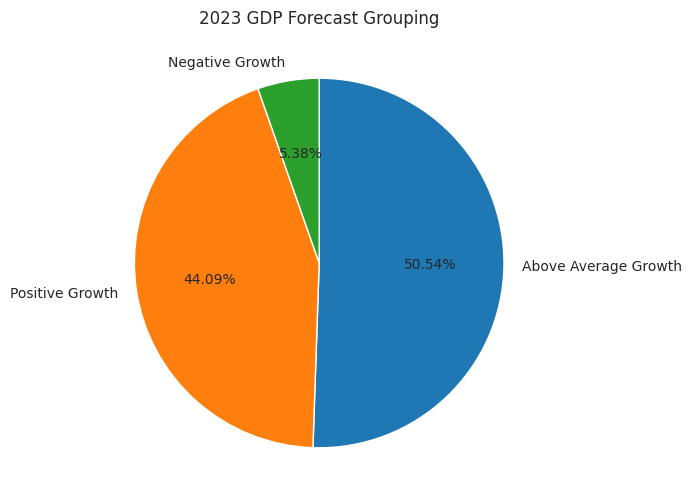

In [23]:
GDP_above_average = len(df.loc[df['2023_GDP_Forecast'] >= 2.47, ['2023_GDP_Forecast']])
GDP_above_zero = len(df.loc[df['2023_GDP_Forecast'].between(0,2.47), ['2023_GDP_Forecast']])
GDP_below_zero = len(df.loc[df['2023_GDP_Forecast'] < 0, ['2023_GDP_Forecast']])
GDP_pie_val = [GDP_above_average,GDP_above_zero, GDP_below_zero]
GDP_pie_name = ['Above Average Growth','Positive Growth', 'Negative Growth']
fig, axes = plt.subplots(1, 1, figsize=(9,6))
ax = axes
ax.pie(GDP_pie_val, labels=GDP_pie_name, counterclock=False, startangle=90, autopct ='%.2f%%')
ax.set_title('2023 GDP Forecast Grouping')
plt.show()

*Personal Bias:*

The harsh environment left by 2022 made me expect that majority of the countries would have negative GDP Growth.

*What the data shows:*

The Pie Chart gave the following output:
*   Countries with negative GDP Growth Forecast = 5.38%
*   Countries with positive but below average GDP Growth Forecast = 44.09%
* Countries with above average GDP Growth Forecast = 50.54%


Contradictory to my personal bias, the majority of countries have positive GDP growth and more than half of those countries have above average GDP growth forecast.



#### Population Composition

The following visualization aim to present the demographics between the countries with above average GDP growth forecast and below average GDP growth forecast.

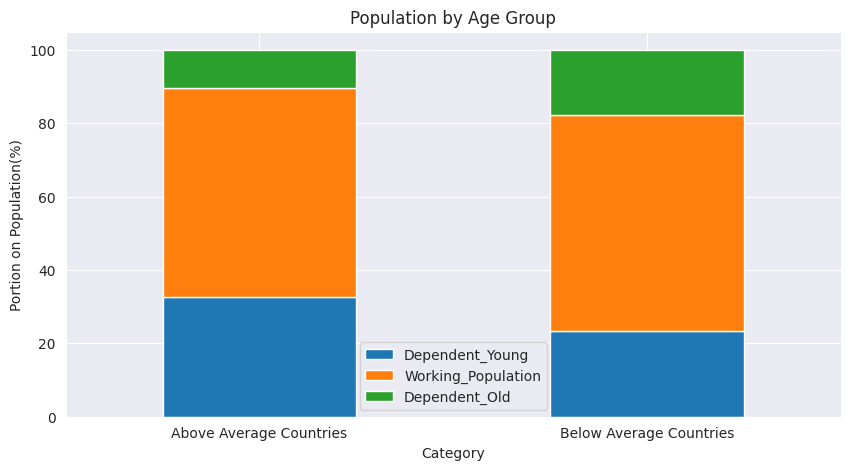

In [24]:
x = ['Above Average Countries', 'Below Average Countries']
plot_Me = pd.DataFrame({'name':x,
                        'Dependent_Young':[df.loc[df['2023_GDP_Forecast'] >= 2.47, 'Dependent_Young'].mean(),df.loc[df['2023_GDP_Forecast'] < 2.47, 'Dependent_Young'].mean()],
                        'Working_Population' : [df.loc[df['2023_GDP_Forecast'] >= 2.47, 'Working_Population'].mean(),df.loc[df['2023_GDP_Forecast'] < 2.47, 'Working_Population'].mean()],
                        'Dependent_Old':[df.loc[df['2023_GDP_Forecast'] >= 2.47, 'Dependent_Old'].mean(), df.loc[df['2023_GDP_Forecast'] < 2.47, 'Dependent_Old'].mean() ]
                      })
Sum_of_means = plot_Me['Dependent_Young'] + plot_Me['Working_Population'] + plot_Me['Dependent_Old']
y1 = [plot_Me.iloc[0,1]*100/list(Sum_of_means)[0],plot_Me.iloc[1,1]*100/list(Sum_of_means)[1]]
y2 = [plot_Me.iloc[0,2]*100/list(Sum_of_means)[0],plot_Me.iloc[1,2]*100/list(Sum_of_means)[1]]
y3 = [plot_Me.iloc[0,3]*100/list(Sum_of_means)[0],plot_Me.iloc[1,3]*100/list(Sum_of_means)[1]]

plot_Me= pd.DataFrame({'name':x,
                          'Dependent_Young':y1,
                          'Working_Population':y2,
                          'Dependent_Old':y3
                    })

ax = plot_Me.plot(kind='bar', stacked=True, title='Population by Age Group', figsize=(10,5))
ax.set_xticklabels(x, rotation=360)
ax.set_ylabel('Portion on Population(%)')
ax.set_xlabel('Category')
plt.show()

*Personal Bias:*

Higher working population means higher production, with this idea I am expecting that the countries with above average GDP growth forecast would have higher working population in relation to their young population and retiree population.

*What the data shows:*

On average, the countries on both category have higher portion of working population. What made them different to each other though is that the countries with above average GDP growth has higher percentage of young population and lower percentge of retiree population.

#### Correlation Between Demograhics and GDP Growth Forecast

This visualization aims to show the correlation between the GDP Growth Forecast and the population categorized into three groups in particular,
* Young Dependent Population
* Working Population
* Dependent Old Population(Retiree Population)
* Working to Dependent Ratio

<ipython-input-27-24b78569e19a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


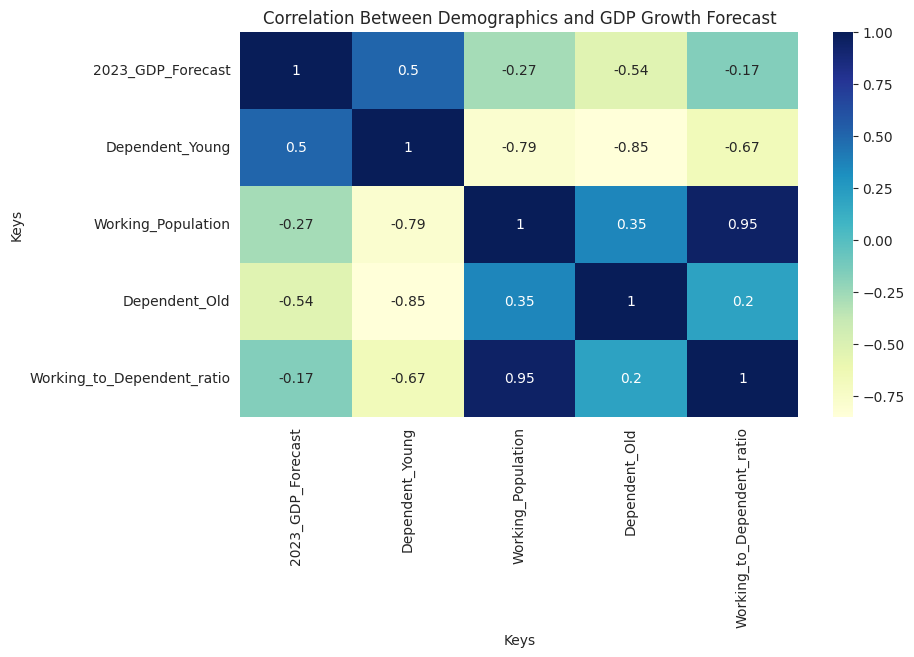

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.xlabel('Keys')
plt.ylabel('Keys')
plt.title('Correlation Between Demographics and GDP Growth Forecast')
plt.show()

*Personal Bias:*

Higher working population means higher production, with this idea I am confident that the GDP Growth Forecast would be highly correlated to the working population.

*What the data shows:*


According to the data, the GDP Growth Forecast has the highest correlation with the average of Dependent Young population. In fact, this is the only positive correlation coefficient of 0.5.

GDP forecast has negative correlation with the average Working Population with correlation coefficient of -0.27.

GDP forecast is inversely correlated with Dependent Old (Retiree) Population with a correlation coefficient of -0.54.

The correlation coefficient between GDP Forecast and Working to Dependent Ratio is  -0.17.



## Asking and Answering Questions

Let's figure out which countries lead the category they belong.



#### Q1: What are the countries that has positive GDP Growth Forecast and are outliers?

In [28]:
df.loc[df['2023_GDP_Forecast'] > 6.8, ['Country', '2023_GDP_Forecast']].sort_values('2023_GDP_Forecast', ascending=False).set_index('Country')

GROUP,2023_GDP_Forecast
Country,
Senegal,9.6
Rwanda,7.8


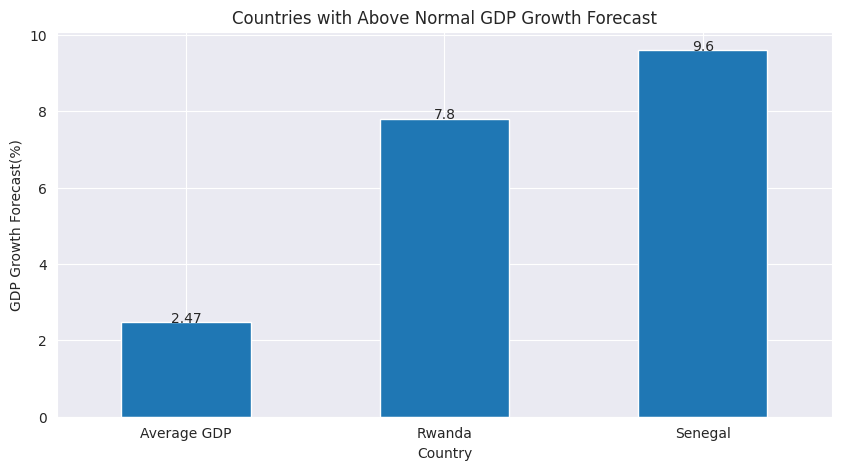

In [29]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
x_values = ['Average GDP']
x_values.extend(df.loc[df['2023_GDP_Forecast'] > 6.8, ['Country']].values.flatten().tolist())
y_values = [2.47]
y_values.extend(df.loc[df['2023_GDP_Forecast'] > 6.8, ['2023_GDP_Forecast']].values.flatten().tolist())
Q1 = pd.DataFrame({
    'name':x_values,
    'forecast': y_values
})

ax = Q1.plot(kind='bar', stacked=True, title='Countries with Above Normal GDP Growth Forecast', figsize=(10,5), legend=False)
ax.set_xticklabels(x_values, rotation=360)
ax.set_ylabel('GDP Growth Forecast(%)')
ax.set_xlabel('Country')
addlabels(x_values, y_values)
plt.show()

There are only 2 countries with GDP Forecast that is above normal(outlier), the countries are Rwanda and Senegal.

#### Q2: What are the countries that has negative GDP Growth Forecast and are outliers? 

In [35]:
df.loc[df['2023_GDP_Forecast'] < -2.0, ['Country','2023_GDP_Forecast']].set_index('Country')

GROUP,2023_GDP_Forecast
Country,
Sri Lanka,-4.0


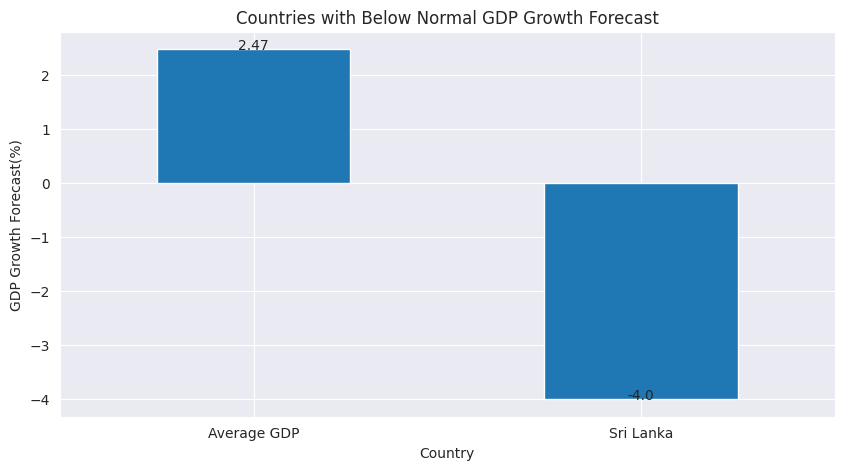

In [31]:
x_values = ['Average GDP']
x_values.extend(df.loc[df['2023_GDP_Forecast'] <-2.0, ['Country']].values.flatten().tolist())
y_values = [2.47]
y_values.extend(df.loc[df['2023_GDP_Forecast'] < -2.0, ['2023_GDP_Forecast']].values.flatten().tolist())
Q1 = pd.DataFrame({
    'name':x_values,
    'forecast': y_values
})

ax = Q1.plot(kind='bar', stacked=True, title='Countries with Below Normal GDP Growth Forecast', figsize=(10,5), legend=False)
ax.set_xticklabels(x_values, rotation=360)
ax.set_ylabel('GDP Growth Forecast(%)')
ax.set_xlabel('Country')
addlabels(x_values, y_values)
plt.show()

There is only 1 country with GDP Forecast that is below normal(outlier), and it is Sri Lanka.

#### Q3: What are the top 10 countries that has above average GDP forecast and not an outlier?

In [37]:
df.loc[df['2023_GDP_Forecast'].between(2.47,6.80), ['Country', '2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=False).head(10).set_index('Country')

GROUP,2023_GDP_Forecast
Country,
Vietnam,6.0
Niger,6.0
India,6.0
Kenya,5.2
Philippines,5.1
Indonesia,5.0
China,5.0
Mozambique,5.0
Mauritius,4.7


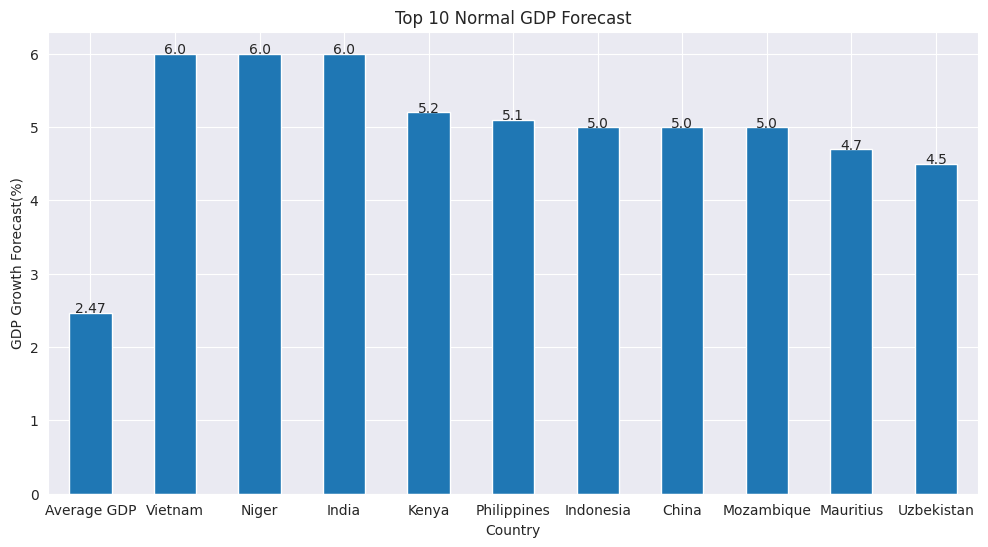

In [33]:
x_values = ['Average GDP']
extend_values = df.loc[df['2023_GDP_Forecast'].between(2.47,6.80), ['Country', '2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=False).head(10)
extend_values = extend_values.values[:,0].tolist()
x_values.extend(extend_values)
y_values = [2.47]
y_values.extend(df.loc[df['2023_GDP_Forecast'].between(2.47,6.80), ['2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=False).head(10).values.flatten().tolist())
Q1 = pd.DataFrame({
    'name':x_values,
    'forecast': y_values
})

ax = Q1.plot(kind='bar', stacked=True, title='Top 10 Normal GDP Forecast', figsize=(12,6), legend=False)
ax.set_xticklabels(x_values, rotation=360)
ax.set_ylabel('GDP Growth Forecast(%)')
ax.set_xlabel('Country')
addlabels(x_values, y_values)
plt.show()

 The top 10 countries that has above average GDP forecast and not an outlier are the following:


1.   Vietnam
2.   Niger
3. India
4. Kenya
5. Philippines
6. Indonesia
7. China
8. Mozambique
9. Mauritius
10. Uzbekistan



#### Q4: What are the top 10 countries that have positive GDP growth but is below average?

In [38]:
df.loc[df['2023_GDP_Forecast'].between(0,2.47), ['Country', '2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=False).head(10).set_index('Country')

GROUP,2023_GDP_Forecast
Country,
Norway,2.4
Montenegro,2.4
Azerbaijan,2.3
Moldova,2.3
Bosnia and Herzegovina,2.2
Singapore,2.0
Colombia,2.0
Bulgaria,1.8
Mexico,1.8


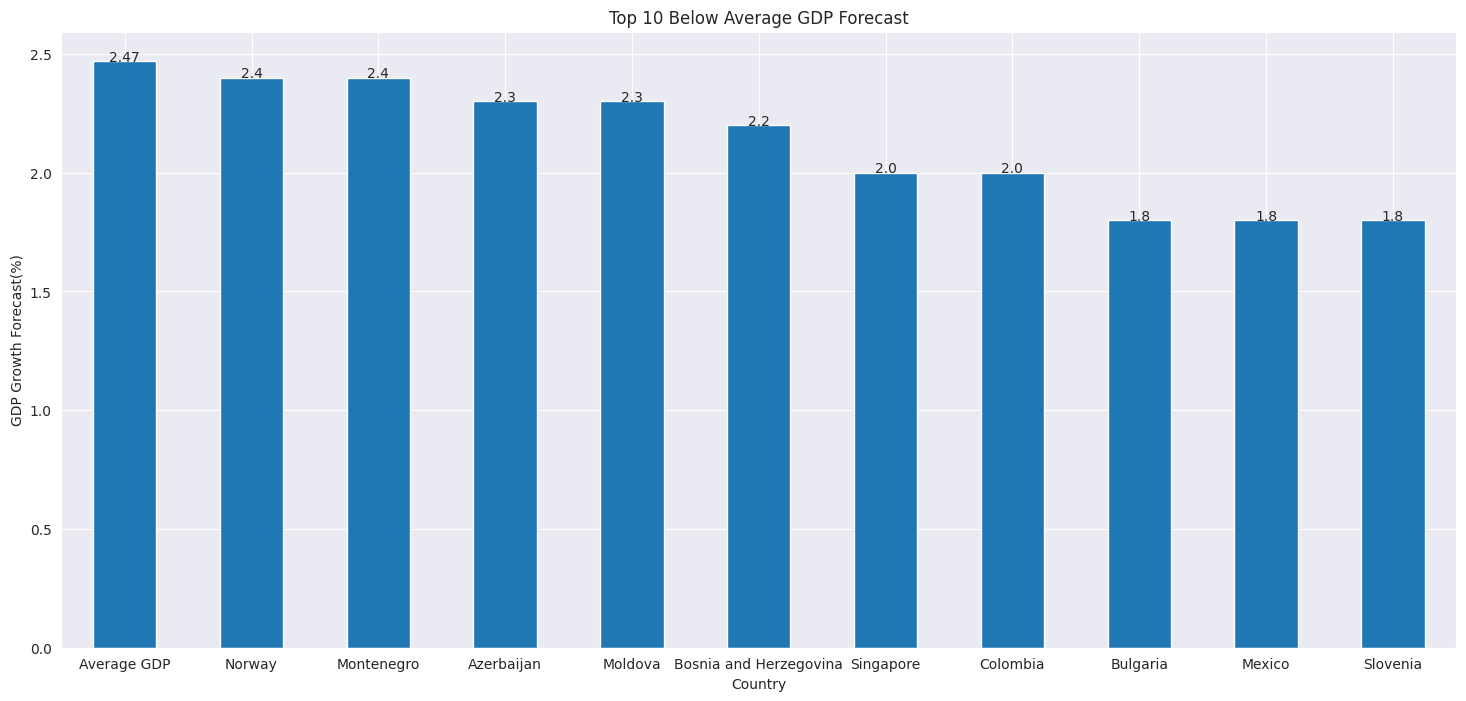

In [ ]:
x_values = ['Average GDP']
extend_values = df.loc[df['2023_GDP_Forecast'].between(0,2.47), ['Country', '2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=False).head(10)
extend_values = extend_values.values[:,0].tolist()
x_values.extend(extend_values)
y_values = [2.47]
y_values.extend(df.loc[df['2023_GDP_Forecast'].between(0,2.47), ['2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=False).head(10).values.flatten().tolist())
Q1 = pd.DataFrame({
    'name':x_values,
    'forecast': y_values
})

ax = Q1.plot(kind='bar', stacked=True, title='Top 10 Below Average GDP Forecast', figsize=(18,8), legend=False)
ax.set_xticklabels(x_values, rotation=360)
ax.set_ylabel('GDP Growth Forecast(%)')
ax.set_xlabel('Country')
addlabels(x_values, y_values)
plt.show()



The top 10 countries that have positive GDP growth but is below average are the following:
1.   Norway
2.   Montenegro
3. Azerbaijan
4. Moldova
5. Bosnia and Herzegovina
6. Singapore
7. Colombia
8. Bulgaria
9. Mexico
10. Slovenia


  



#### Q5: What are the countries that has negative GDP growth but is not an outlier? Sort from lowest to highest.

In [39]:
df.loc[df['2023_GDP_Forecast'].between(-2,0), ['Country', '2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast']).set_index('Country')

GROUP,2023_GDP_Forecast
Country,
Russia,-1.0
Sweden,-0.9
Chile,-0.6
United Kingdom,-0.6


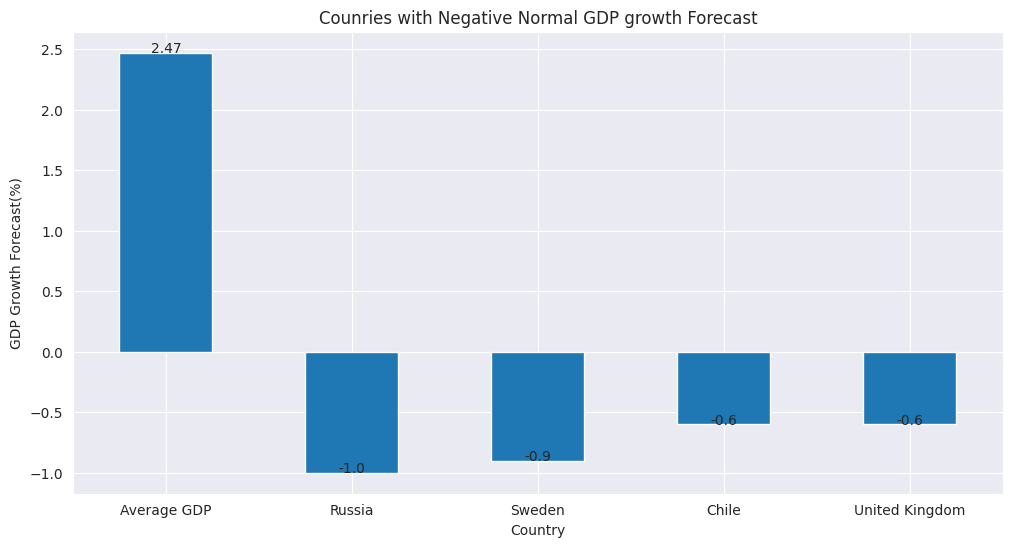

In [ ]:
x_values = ['Average GDP']
extend_values = df.loc[df['2023_GDP_Forecast'].between(-2,0), ['Country', '2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=True).head(10)
extend_values = extend_values.values[:,0].tolist()
x_values.extend(extend_values)
y_values = [2.47]
y_values.extend(df.loc[df['2023_GDP_Forecast'].between(-2,0), ['2023_GDP_Forecast']].sort_values(['2023_GDP_Forecast'], ascending=True).head(10).values.flatten().tolist())
Q1 = pd.DataFrame({
    'name':x_values,
    'forecast': y_values
})

ax = Q1.plot(kind='bar', stacked=True, title='Counries with Negative Normal GDP growth Forecast', figsize=(12,6), legend=False)
ax.set_xticklabels(x_values, rotation=360)
ax.set_ylabel('GDP Growth Forecast(%)')
ax.set_xlabel('Country')
addlabels(x_values, y_values)
plt.show()

 The countries that has negative GDP growth but is not an outlier are the following:
 1. Russia
 2. Sweden
 3. Chile
 4. United Kingdom

## Inferences and Conclusion

Analyzing the graphs, all of my personal bias was disproven more times than not. Despite the fact that 2023 started rough for the global economy, that doesn't affect the majority of countries and they still have positive GDP Growth Forecast that is enough to pull the average to the positive side.

Also. My personal bias that the greater the portion of working population the higher the GDP forecast, and again I was mistaken. By GDP Forecast is a lot more positively correlated to the portion of younger population. I think deeper studies are needed to figure out why this is so.

## References and Future Work

I am hoping that this data would further be studied in order to find the reason why the expected GDP growth is more correlated to the number of young population despite the fact that they are contributing to the work force.


Sources:                          
census.gov                                                      
tradingeconomics.com
